In [1]:
# The Usual
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
listings = pd.read_csv("listings.csv", usecols=['id', 'name','availability_365'])
listings = listings.dropna()
listings = listings.rename(columns={'id': 'listing_id'})
listings.head()

,listing_id,name,availability_365
0,3647,THE VILLAGE OF HARLEM....NEW YORK !,365
1,3831,Cozy Entire Floor of Brownstone,192
2,5022,Entire Apt: Spacious Studio/Loft by central park,0
3,5099,Large Cozy 1 BR Apartment In Midtown East,13
4,5121,BlissArtsSpace!,0


In [52]:
listings.values[0][2]

365

In [53]:
topics =["bedroom","sunny","train","close","clean","luxury","min","walk","huge","share","apartment",
         "heart","home","time","location","village","away","good","place","amazing","room","private",
         "bed","large","bathroom","comfortable","side","stay","park","low","spacious","studio","cozy",
         "modern","beautiful","bright","new","renovate","quiet","view"]


# Frequency of hot keywords per listing

In [56]:
from collections import defaultdict
high_avail = defaultdict(int)

for i in listings.values:
    if i[2] >= 0:

        for word in topics:
#             count = 0
            if word in str(i[1]):
#                 count += 1         
                high_avail[word] +=1
        

In [57]:
high_avail

defaultdict(int,
            {'park': 338,
             'away': 706,
             'room': 13001,
             'studio': 949,
             'apartment': 2566,
             'bed': 4357,
             'bedroom': 3418,
             'home': 671,
             'share': 288,
             'private': 1767,
             'min': 3369,
             'bright': 248,
             'place': 309,
             'cozy': 703,
             'heart': 1082,
             'huge': 118,
             'time': 45,
             'luxury': 237,
             'view': 589,
             'location': 634,
             'clean': 319,
             'stay': 154,
             'sunny': 407,
             'bathroom': 405,
             'close': 686,
             'new': 292,
             'low': 119,
             'spacious': 564,
             'modern': 263,
             'renovate': 254,
             'large': 283,
             'side': 619,
             'quiet': 355,
             'comfortable': 141,
             'train': 633,
             'beaut

# Review Score vs. Keyword Ferequency

In [54]:
from collections import defaultdict
keyword_count = {}

for i in listings.values:
    if i[2] >= 0:
        count=0
        for word in topics:
            if word in str(i[1]):
                count += 1         
                keyword_count[i[0]] =count
        

In [60]:
# cols = listing_id, frequency, avg. score
df2 = pd.DataFrame(list(high_avail.items()), columns = ['keyword', 'keyword frequency'])

# df2 = pd.concat(df2, listings)
df2.head()


,keyword,keyword frequency
0,park,338
1,away,706
2,room,13001
3,studio,949
4,apartment,2566


In [63]:
# cols = listing_id, frequency, avg. score
df3 = pd.DataFrame(list(keyword_count.items()), columns = ['listing_id', 'topic frequency'])

df3 = pd.merge(df3, listings, on='listing_id')
df3.head()

,listing_id,topic frequency,name,availability_365
0,5022,1,Entire Apt: Spacious Studio/Loft by central park,0
1,5222,1,Best Hideaway,347
2,6021,1,Wonderful Guest Bedroom in Manhattan CENTRAL PARK,329
3,6848,1,Only 2 stops to Manhattan studio,111
4,8490,1,"MAISON DES SIRENES1,bohemian apartment",279


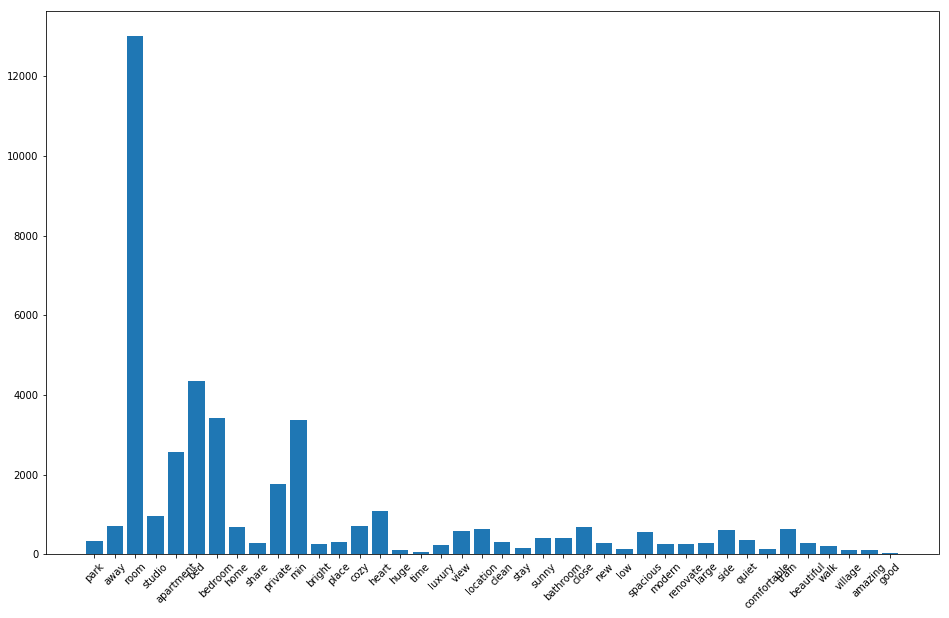

In [48]:
plt.figure(num=None, figsize=(16, 10))
plt.bar(df2['keyword'], df2['keyword frequency'])

plt.xticks(rotation= 45);

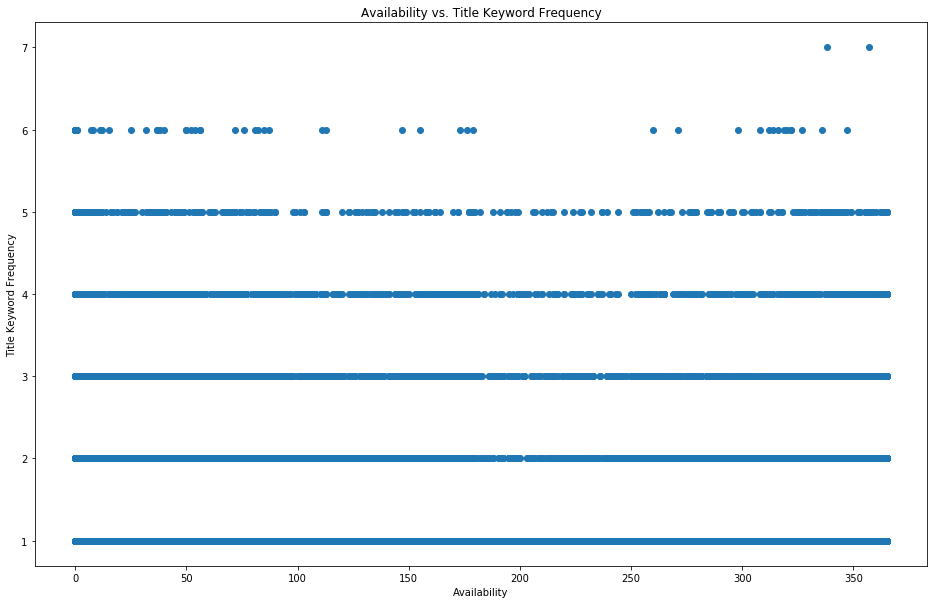

In [65]:
plt.figure(num=None, figsize=(16, 10))
plt.title('Availability vs. Title Keyword Frequency')
plt.xlabel('Availability')
plt.ylabel('Title Keyword Frequency')
plt.scatter(df3['availability_365'], df3['topic frequency'], )